In [6]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime
import pandas

In [7]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

In [8]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=2)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

In [9]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at   5.000 km (ASL): 9.7802 m/s²


Launch Site Details

Launch Date: 2024-08-09 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 5.000 km
Forecast Time Period: From  2024-08-07 18:00:00  to  2024-08-23 18:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 3.76 m/s
Surface Wind Direction: 10.84°
Surface Wind Heading: 190.84°
Surface Pressure: 855.05 hPa
Surface Temperature: 296.91 K
Surface Air Density: 1.003 kg/m³
Surface Speed of Sound: 345.43 m/s


Earth Model Details

Earth Radi

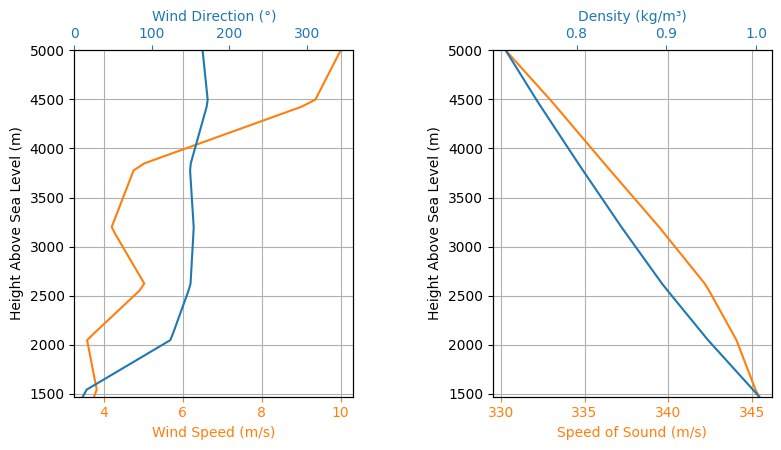

In [10]:
env.max_expected_height = 5000  # adjust the plots to this height
env.info()

In [11]:
Pro75M1670 = SolidMotor(
    thrust_source="Cesaroni_M1670.eng",
    dry_mass=2.130,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



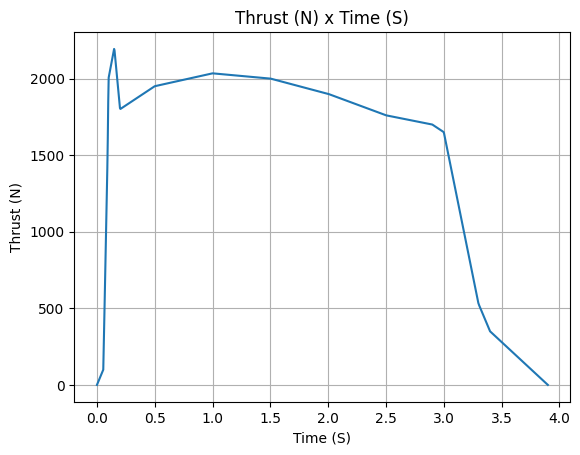

In [12]:
Pro75M1670.info()

In [13]:
calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="powerOffDragCurve.csv",
    power_on_drag="powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

In [14]:
calisto.add_motor(Pro75M1670, position=-1.255)

In [15]:
rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.6182,
    angular_position=45,
)

In [ ]:
nose_cone = calisto.add_nose(
    length=0.55829, kind="von karman", position=1.278
)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("NACA0012-radians.csv","radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)